In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import random
import warnings


warnings.simplefilter("ignore")

: 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve

In [16]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [23]:
data = pd.read_csv('Training set.csv')

In [24]:
data

,Question,Type
0,What's the overall COVID status in US,1
1,How's the Covid going in American this week,1
2,How many new case in United States today,1
3,How's everything goes in Wisconsin this week,2
4,The overall data of Illinois,2
5,what's the Covid data overview in California,2
6,How many new case in Ohio this week,3
7,Show me the case trend in New York state this ...,3
8,The case graph in South Dekota these days,3
9,Show me the COVID trend in American,1


In [25]:
train =data[:9]
trainX = data['Question']
trainY = data['Type'].values
train


,Question,Type
0,What's the overall COVID status in US,1
1,How's the Covid going in American this week,1
2,How many new case in United States today,1
3,How's everything goes in Wisconsin this week,2
4,The overall data of Illinois,2
5,what's the Covid data overview in California,2
6,How many new case in Ohio this week,3
7,Show me the case trend in New York state this ...,3
8,The case graph in South Dekota these days,3


In [26]:
valid = data[9:12]
validX = valid['Question']
validY = valid['Type'].values
valid


,Question,Type
9,Show me the COVID trend in American,1
10,The case trend in Minnesota,3
11,The Covid status in Miami,2


In [27]:
vectorizer = TfidfVectorizer()

trainX = vectorizer.fit_transform(trainX)
validX = vectorizer.transform(validX)


In [28]:
lr_classifier = LogisticRegression(C=1.)
lr_classifier.fit(trainX, trainY)

LogisticRegression()

In [29]:
print(f"Validation Accuracy of Logsitic Regression Classifier is: {(lr_classifier.score(validX, validY))*100:.2f}%")

Validation Accuracy of Logsitic Regression Classifier is: 100.00%


In [19]:
def plot_metric(clf, testX, testY, name):
    """
    Small function to plot ROC-AUC values and confusion matrix
    """
    styles = ['bmh', 'classic', 'fivethirtyeight', 'ggplot']

    plt.style.use(random.choice(styles))
    plot_confusion_matrix(clf, testX, testY)
    plt.title(f"Confusion Matrix [{name}]")

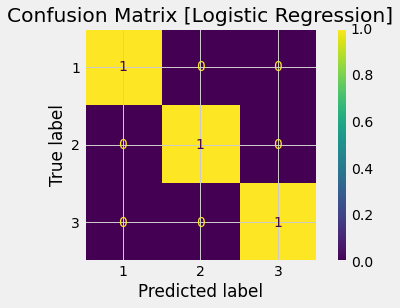

In [30]:
plot_metric(lr_classifier, validX, validY, "Logistic Regression")